In [1]:
import sys
import collections
import numpy as np
from scipy.signal import savgol_filter, convolve, normalize
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import time

# Allows me to import my modules
sys.path.append('./modules')
from audio_utils import *
import data_augmentation as data_aug

Attempting to read settings file...
	Read successfully!


In [2]:
file_i = 0

In [3]:
samples = read_data(data_type="cropped", file_index=file_i, batch_size=200, verbose=True)
print(len(samples) if samples is not False else 0)
file_i += 1

Attempting to read 200 cropped data and labels (from index 0 )...
	Read: 200/200 (922 files found).
200


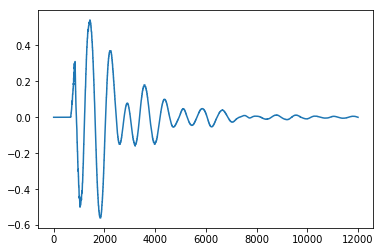

{'hit_label': ['beater'], 'kit_label': ['bass_drum'], 'tech_label': ['normal']} {}


In [8]:
plt.plot(samples[3].data)
plt.show()
print(samples[3].labels, samples[3].augmentations)
ipd.Audio(samples[3].data, rate=samples[3].rate)

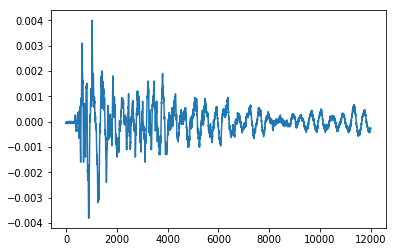

{'hit_label': ['beater'], 'kit_label': ['bass_drum'], 'tech_label': ['normal']} {}


In [5]:
plt.plot(samples[4].data)
plt.show()
print(samples[4].labels, samples[4].augmentations)
ipd.Audio(samples[4].data, rate=samples[4].rate)

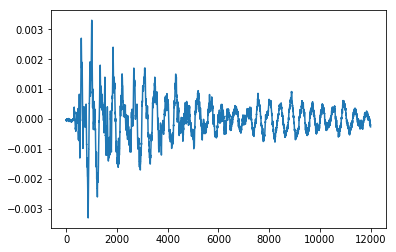

{'hit_label': ['beater'], 'kit_label': ['bass_drum'], 'tech_label': ['normal']} {}


In [6]:
plt.plot(samples[5].data)
plt.show()
print(samples[5].labels, samples[5].augmentations)
ipd.Audio(samples[5].data, rate=samples[5].rate)

In [7]:
augmented_samples = data_aug.post_multiclass_augmentation(samples)

In [8]:
aug_stacks = [[aug] for aug in data_aug.POST_MULTI_AUGS]
# Create new augmentation data ordered dictionary
aug_data = collections.OrderedDict([("-".join(stack), []) for stack in aug_stacks])
aug_keys = list(aug_data.keys())
print(aug_stacks, "\n", aug_data, "\n", aug_keys)

[['reduce_noise'], ['add_noise']] 
 OrderedDict([('reduce_noise', []), ('add_noise', [])]) 
 ['reduce_noise', 'add_noise']


In [9]:
len(augmented_samples)

200

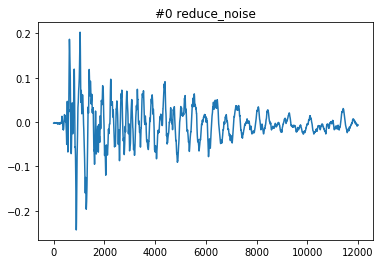

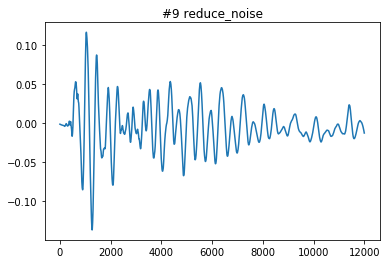

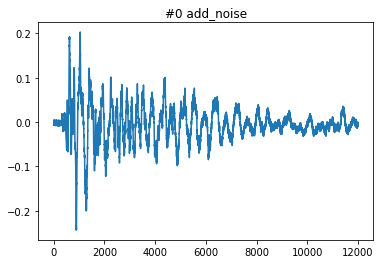

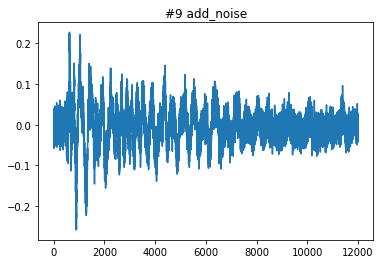

In [10]:
for d in range(len(aug_keys)):
    for n in [0, 9]:
        aug = aug_keys[d]
        plt.plot(augmented_samples[0][aug][n])
        plt.title("#{} {}".format(n, aug))
        plt.show()

In [11]:
augmented_sample_data = []
for s in range(len(samples)):
    for stack_key in aug_keys:
        aug_amount = len(augmented_samples[s][stack_key])
        post_augs = stack_key.split("-")
        augs = {k:v for k,v in samples[s].augmentations.items()}
        augs.update({"post_augs": post_augs})
        for d in range(aug_amount):
            augmented_sample_data.append(Sample_data(labels=samples[s].labels, augmentations=augs, rate=samples[s].rate, data=augmented_samples[s][stack_key][d]))

In [12]:
for asd in augmented_sample_data:
    print("Labels: {}\n\nAugmentations: {}\n\n".format(asd.labels, asd.augmentations))

Labels: {'hit_label': ['beater'], 'tech_label': ['normal'], 'kit_label': ['bass_drum']}

Augmentations: {'pre_augs': ['amplitude'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['beater'], 'tech_label': ['normal'], 'kit_label': ['bass_drum']}

Augmentations: {'pre_augs': ['amplitude'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['beater'], 'tech_label': ['normal'], 'kit_label': ['bass_drum']}

Augmentations: {'pre_augs': ['amplitude'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['beater'], 'tech_label': ['normal'], 'kit_label': ['bass_drum']}

Augmentations: {'pre_augs': ['amplitude'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['beater'], 'tech_label': ['normal'], 'kit_label': ['bass_drum']}

Augmentations: {'pre_augs': ['amplitude'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['beater'], 'tech_label': ['normal'], 'kit_label': ['bass_drum']}

Augmentations: {'pre_augs': ['amplitude'], 'post_augs': ['reduce_noise']}


Labels: {'


Labels: {'hit_label': ['stick', 'stick'], 'tech_label': ['normal', 'normal'], 'kit_label': ['hi_hat', 'ride']}

Augmentations: {'pre_augs': ['amplitude', 'amplitude'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['stick', 'stick'], 'tech_label': ['normal', 'normal'], 'kit_label': ['hi_hat', 'ride']}

Augmentations: {'pre_augs': ['amplitude', 'amplitude'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['stick', 'stick'], 'tech_label': ['normal', 'normal'], 'kit_label': ['hi_hat', 'ride']}

Augmentations: {'pre_augs': ['amplitude', 'amplitude'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['stick', 'stick'], 'tech_label': ['normal', 'normal'], 'kit_label': ['hi_hat', 'ride']}

Augmentations: {'pre_augs': ['amplitude', 'amplitude'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['stick', 'stick'], 'tech_label': ['normal', 'normal'], 'kit_label': ['hi_hat', 'ride']}

Augmentations: {'pre_augs': ['amplitude', 'amplitude'], 'post_augs': ['reduce_noise

Labels: {'hit_label': ['beater', 'stick'], 'tech_label': ['normal', 'normal'], 'kit_label': ['bass_drum', 'hi_hat']}

Augmentations: {'pre_augs': ['amplitude', 'amplitude', 'pitch', 'translate'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['beater', 'stick'], 'tech_label': ['normal', 'normal'], 'kit_label': ['bass_drum', 'hi_hat']}

Augmentations: {'pre_augs': ['amplitude', 'amplitude', 'pitch', 'translate'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['beater', 'stick'], 'tech_label': ['normal', 'normal'], 'kit_label': ['bass_drum', 'hi_hat']}

Augmentations: {'pre_augs': ['amplitude', 'amplitude', 'pitch', 'translate'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['beater', 'stick'], 'tech_label': ['normal', 'normal'], 'kit_label': ['bass_drum', 'hi_hat']}

Augmentations: {'pre_augs': ['amplitude', 'amplitude', 'pitch', 'translate'], 'post_augs': ['reduce_noise']}


Labels: {'hit_label': ['beater', 'stick'], 'tech_label': ['normal', 'normal'], 'kit_

In [ ]:
save_data("post_multiclass_augmented", data_set=augmented_sample_data, verbose=True)

Attempting to save post_multiclass_augmented data and labels...


In [ ]:
for stack_key in aug_keys:
    aug_amount = len(augmented_samples[0][stack_key])
    for d in range(aug_amount):
        plt.plot(augmented_samples[0][stack_key][d])
        plt.title("{} diff: {}".format(stack_key, d))
        plt.show()

In [ ]:
ipd.Audio(samples[0].data, rate=samples[0].rate)

In [ ]:
ipd.Audio(augmented_samples[0]["add_noise"][0], rate=samples[0].rate)

In [22]:
ipd.Audio(augmented_samples[0]["add_noise"][-1], rate=samples[0].rate)

In [23]:
ipd.Audio(augmented_samples[0]["reduce_noise"][0], rate=samples[0].rate)

In [24]:
ipd.Audio(augmented_samples[0]["reduce_noise"][-1], rate=samples[0].rate)

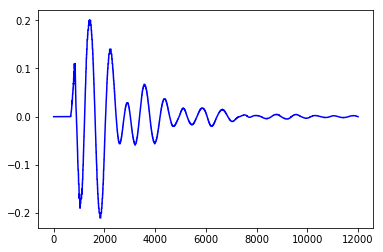

In [26]:
plt.plot(samples[2].data, color="blue")
plt.show()

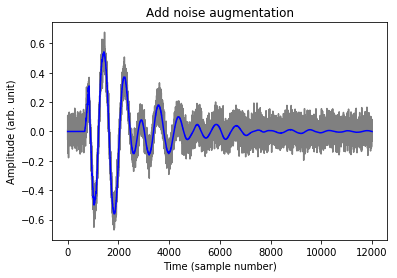

In [11]:
plt.plot(augmented_samples[3]["add_noise"][-1], color="grey")
plt.plot(samples[3].data, color="blue")
plt.title("Add noise augmentation")
plt.xlabel("Time (sample number)")
plt.ylabel("Amplitude (arb. unit)")
plt.show()

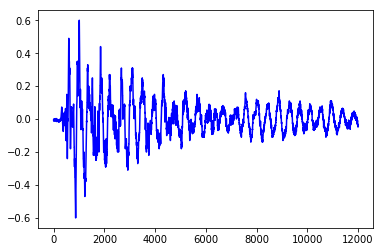

In [34]:
plt.plot(samples[1].data, color="blue")
plt.show()

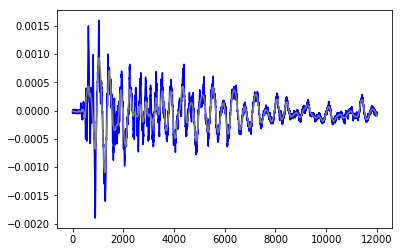

In [10]:
plt.plot(samples[0].data, color="blue")
plt.plot(augmented_samples[0]["reduce_noise"][-1], color="grey")
plt.show()

In [36]:
## Post multiclass aug loops (scale 50 -> 1000) 123MB -> ~2.46GB

In [3]:
aug_stacks = [[aug] for aug in data_aug.POST_MULTI_AUGS]
# Create new augmentation data ordered dictionary
aug_data = collections.OrderedDict([("-".join(stack), []) for stack in aug_stacks])
aug_keys = list(aug_data.keys())
print(aug_stacks, "\n", aug_data, "\n", aug_keys)
input_output_data_sets = [("multiclassed", "post_multiclass_augmented"), ("multiclassed_no_augs", "post_multiclass_augmented_no_pre"), ("multiclassed_per_aug", "post_multiclass_augmented_per_pre")]

for io_data_type in input_output_data_sets:
    file_i = 0
    data_info = SETTINGS.data[io_data_type[0]]
    while True:
        samples = read_data(data_type=io_data_type[0], file_index=file_i, batch_size=data_info["batch_size"])
        print("Saved: ", str(round(file_i/(5992//data_info["batch_size"] + 1)*100, 2))+"%" if samples is not False else "100%")
        if samples is False:
            break
        file_i += 1
        augmented_samples = data_aug.post_multiclass_augmentation(samples)
        augmented_sample_data = []
        for s in range(len(samples)):
            for stack_key in aug_keys:
                aug_amount = len(augmented_samples[s][stack_key])
                post_augs = stack_key.split("-")
                augs = {k:v for k,v in samples[s].augmentations.items()}
                augs.update({"post_augs": post_augs})
                for d in range(aug_amount):
                    augmented_sample_data.append(Sample_data(labels=samples[s].labels, augmentations=augs, rate=samples[s].rate, data=augmented_samples[s][stack_key][d]))
        print("Saving...")
        save_data(io_data_type[1], data_set=augmented_sample_data)

[['reduce_noise'], ['add_noise']] 
 OrderedDict([('reduce_noise', []), ('add_noise', [])]) 
 ['reduce_noise', 'add_noise']
Saved:  0.0%
Saving...
Saved:  0.83%
Saving...
Saved:  1.67%
Saving...
Saved:  2.5%
Saving...
Saved:  3.33%
Saving...
Saved:  4.17%
Saving...
Saved:  5.0%
Saving...
Saved:  5.83%
Saving...
Saved:  6.67%
Saving...
Saved:  7.5%
Saving...
Saved:  8.33%
Saving...
Saved:  9.17%
Saving...
Saved:  10.0%
Saving...
Saved:  10.83%
Saving...
Saved:  11.67%
Saving...
Saved:  12.5%
Saving...
Saved:  13.33%
Saving...
Saved:  14.17%
Saving...
Saved:  15.0%
Saving...
Saved:  15.83%
Saving...
Saved:  16.67%
Saving...
Saved:  17.5%
Saving...
Saved:  18.33%
Saving...
Saved:  19.17%
Saving...
Saved:  20.0%
Saving...
Saved:  20.83%
Saving...
Saved:  21.67%
Saving...
Saved:  22.5%
Saving...
Saved:  23.33%
Saving...
Saved:  24.17%
Saving...
Saved:  25.0%
Saving...
Saved:  25.83%
Saving...
Saved:  26.67%
Saving...
Saved:  27.5%
Saving...
Saved:  28.33%
Saving...
Saved:  29.17%
Saving...
S